<a href="https://colab.research.google.com/github/lucaspn017/Testing_hypotheses/blob/main/Tentando_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Conjunto de dados TechTaste

df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [ ]:
contagem = df_techtaste['avaliacoes'].value_counts().sort_index()

# Extraindo informações do dados da empresa Techtaste.

In [ ]:
# Desvio padrão.
desvio_padrao = df_techtaste['avaliacoes'].std()

# Erro padrão.
erro_padrao = stats.sem(df_techtaste['avaliacoes'])
# Outra forma.
erro_pad = df_techtaste['avaliacoes'].std()/np.sqrt(80)

# Erro padrão amostral da média.
media = df_techtaste['avaliacoes'].mean()

print(f'Desvio padrão: {desvio_padrao:.2f}\nErro padrão: {erro_padrao:.2f}\nMédia: {media:.2f}\nErro padrão alternativo: {erro_pad:.2f}')


Desvio padrão: 6.42
Erro padrão: 0.72
Média: 40.02
Erro padrão alternativo: 0.72


In [ ]:
desviopadrao = desvio_padrao/desvio_padrao*np.sqrt(80)

# Verificando a distribuição dos dados.


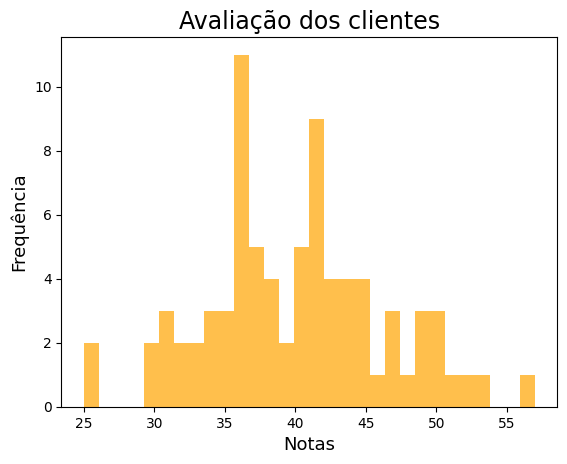

In [ ]:
plt.hist(df_techtaste, bins=30, alpha=0.7, color='orange')
plt.title('Avaliação dos clientes',fontsize=17)
plt.ylabel('Frequência', fontsize=13)
plt.xlabel('Notas', fontsize=13)
plt.show()

In [ ]:
perc_obs = (df_techtaste[(df_techtaste['avaliacoes'] > media -14*erro_pad)&(df_techtaste['avaliacoes'] < media + 14*erro_pad)].count()) / df_techtaste['avaliacoes'].count()
perc_obs = perc_obs['avaliacoes']*100
print(f'Percentual de observações: {perc_obs}')


Percentual de observações: 92.5


# Índice de confiança para 14 desvios padrão.

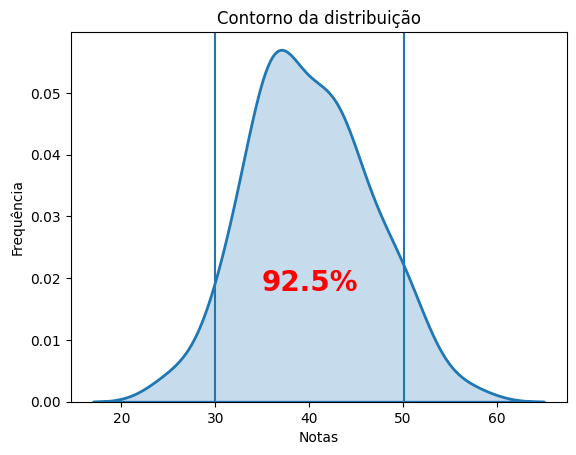

In [ ]:
sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Notas')
plt.ylabel('Frequência',)
plt.title('Contorno da distribuição')
plt.axvline(media-14*erro_pad)
plt.axvline(media+14*erro_pad)

xmin, xmax = plt.xlim()
plt.fill_betweenx(np.linspace(0, max(stats.norm.pdf(np.linspace(media-3*desvio_padrao, media+3*desvio_padrao, 100))), 100), media-14*erro_pad, media+14*erro_pad, color='red', alpha=0.1)

# Adicionar descrição
descricao = str(perc_obs) + '%'
plt.text(media, plt.ylim()[1]*0.3, descricao, fontsize=20, color='red', fontweight='bold', ha='center')
plt.show()

#Obtendo o intervalo para 90%

In [ ]:
# Melhorando o cálculo:

# A função a seguir exige três argumentos: O nível de confiança, a média da distribuição e
# o desvio padrão da distribuição normal.

intervalo = stats.norm.interval(0.9, loc= df_techtaste['avaliacoes'].mean(), scale= erro_padrao)
print(intervalo)

(38.84402439920928, 41.205975600790715)


#Testando a hipótese nula: μ = 30

In [ ]:
#Hipótese nula: Média populacional=30.
#Hipótese alternativa: Média populacional!=30

n_conf= 0.95
desv_pad_pop= 2.65

tamanho_amostra = len(df_techtaste)
media_nula = 30

intervalo = stats.norm.interval(n_conf, loc= media_nula, scale=2.65/np.sqrt(tamanho_amostra))
print(intervalo)

(29.419303816868016, 30.580696183131984)


# Obtendo a estatística de teste Z e seu valor correspondente.

In [ ]:
from statsmodels.stats.weightstats import ztest

stat, p_valor = ztest(x1=df_techtaste['avaliacoes'], value=media_nula, alternative = 'two-sided')

print(f'Estatística do teste Z: {stat} \nP-valor: {p_valor}')


Estatística do teste Z: 13.96274198988354 
P-valor: 2.6311293593122384e-44


In [ ]:
if p_valor < n_conf:
  resultado = 'Rejeitar a hipótese nula.'
else:
  resultado = 'Aceitar a hipótese nula.'

print('Resultado:', resultado)

Resultado: Rejeitar a hipótese nula.
